In [1]:
import pandas as pd
# Load the CSV file into a pandas DataFrame
df = pd.read_excel('/content/팀기록.xlsx')

# Display the first 5 rows of the DataFrame
display(df.head())

,Rank,Team,Year,G,oWAR,dWAR,PA,ePA,AB,R,...,CS RAA,Blk RAA,Frm RAA,종합 RAA,/144,POSAdj,RAAwithPOS,WAAwoPOS,WAAwithPOS,승률
0,1,LG,2024,144,28.06,2.23,5725,5670,4919,808,...,0,0,NaN,23.57,1.39,-9.05,14.37,2.154,1.289,0.535
1,2,LG,2023,144,32.98,0.69,5687,5587,4881,767,...,0,0,NaN,6.73,0.40,-8.75,-2.02,0.687,-0.164,0.606
2,3,LG,2022,144,29.78,2.26,5627,5566,4927,715,...,0,0,NaN,21.98,1.28,-8.85,13.12,2.266,1.294,0.613
3,4,LG,2021,144,21.54,1.28,5533,5471,4750,654,...,0,0,NaN,12.86,0.71,-9.05,3.81,1.275,0.577,0.554
4,5,LG,2020,144,27.16,0.33,5681,5624,4999,802,...,0,0,NaN,3.39,0.19,-8.49,-4.97,0.319,-0.382,0.564


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import statsmodels.formula.api as smf

# Fit the OLS model using the formula and the DataFrame
model_runs = smf.ols(formula=formula, data=df)
results_runs = model_runs.fit()

# Display the regression summary
print(results_runs.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     133.5
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           1.98e-25
Time:                        10:04:52   Log-Likelihood:                -219.04
No. Observations:                  50   AIC:                             450.1
Df Residuals:                      44   BIC:                             461.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -440.9082     83.394     -5.287      0.0

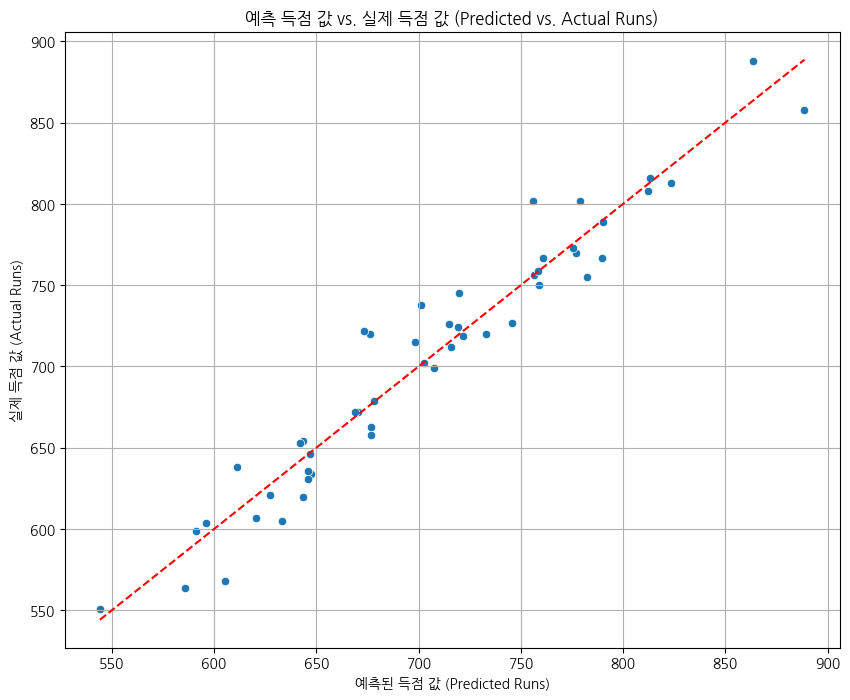

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Add the font to FontManager
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
if fm.findfont('NanumGothic', rebuild_if_missing=False) is None:
    fm.fontManager.addfont(font_path)

# Configure matplotlib to use a Korean-supporting font
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # This handles minus signs in Korean fonts

# Get actual values (dependent variable from the DataFrame)
actual_values = df['R']
# Get predicted values from the fitted model
predicted_values = df['Predicted_R']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=predicted_values, y=actual_values)

# Add a 45-degree line representing perfect predictions
min_val = min(predicted_values.min(), actual_values.min())
max_val = max(predicted_values.max(), actual_values.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('예측된 득점 값 (Predicted Runs)')
plt.ylabel('실제 득점 값 (Actual Runs)')
plt.title('예측 득점 값 vs. 실제 득점 값 (Predicted vs. Actual Runs)')
plt.grid(True)
plt.show()

In [15]:
comparison_df = df[['Team', 'Year', 'R', 'Predicted_R', '차이', '오차율(%)']]
print("Actual vs. Predicted Runs Comparison:")
display(comparison_df.head())

Actual vs. Predicted Runs Comparison:


,Team,Year,R,Predicted_R,차이,오차율(%)
0,LG,2024,808,812.035312,-4.035312,0.499420
1,LG,2023,767,761.048304,5.951696,0.775971
2,LG,2022,715,698.499284,16.500716,2.307792
3,LG,2021,654,643.381586,10.618414,1.623611
4,LG,2020,802,756.212492,45.787508,5.709166


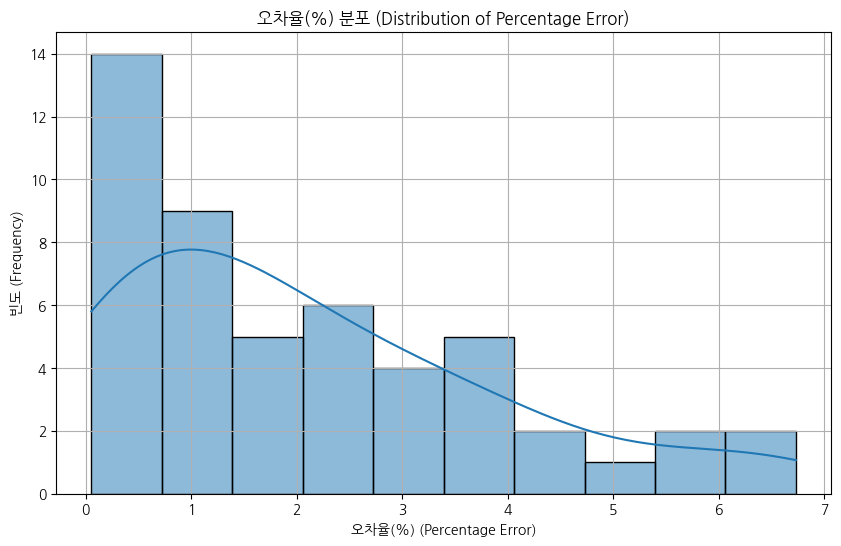

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure matplotlib to use a Korean-supporting font
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # This handles minus signs in Korean fonts

# Create a histogram of the '오차율(%)' column
plt.figure(figsize=(10, 6))
sns.histplot(df['오차율(%)'], kde=True, bins=10) # kde=True adds a kernel density estimate

# Set labels and title
plt.xlabel('오차율(%) (Percentage Error)')
plt.ylabel('빈도 (Frequency)')
plt.title('오차율(%) 분포 (Distribution of Percentage Error)')
plt.grid(True)
plt.show()

In [20]:
print("Teams with the LOWEST Percentage Error (best prediction accuracy):")
display(df.sort_values(by='오차율(%)', ascending=True)[['Team', 'Year', 'R', 'Predicted_R', '차이', '오차율(%)']].head())

Teams with the LOWEST Percentage Error (best prediction accuracy):


,Team,Year,R,Predicted_R,차이,오차율(%)
10,SSG,2024,756,756.419757,-0.419757,0.055523
23,NC,2021,702,702.448529,-0.448529,0.063893
49,키움,2020,759,758.478030,0.521970,0.068771
22,NC,2022,646,646.752396,-0.752396,0.116470
21,NC,2023,679,678.117779,0.882221,0.129929


**Reasoning**:
To identify teams with the highest (worst) prediction accuracy, I will sort the DataFrame `df` by '오차율(%)' in descending order and display the top 5 rows with the relevant columns.



In [21]:
print("\nTeams with the HIGHEST Percentage Error (worst prediction accuracy):")
display(df.sort_values(by='오차율(%)', ascending=False)[['Team', 'Year', 'R', 'Predicted_R', '차이', '오차율(%)']].head())


Teams with the HIGHEST Percentage Error (worst prediction accuracy):


,Team,Year,R,Predicted_R,차이,오차율(%)
48,키움,2021,722,673.402620,48.597380,6.730939
38,KIA,2021,568,605.465981,-37.465981,6.596123
12,SSG,2022,720,676.487807,43.512193,6.043360
4,LG,2020,802,756.212492,45.787508,5.709166
43,두산,2021,738,701.389658,36.610342,4.960751
